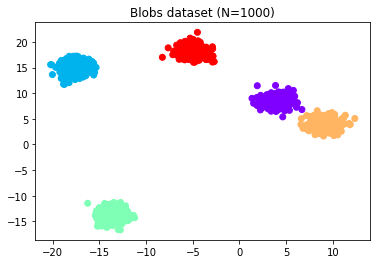











Best number of clusters: 5
Test set prediction ACC: 1.0
AMI (true labels vs predicted labels) = 1.0
Validation set normalized stability (misclassification):(0.0, (0.0, 0.0))
Test set ACC = 1.0 (true labels vs predicted labels)


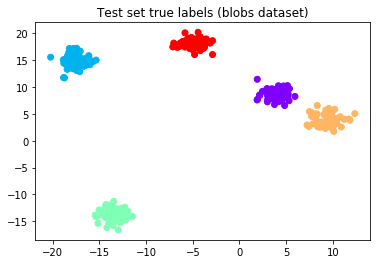

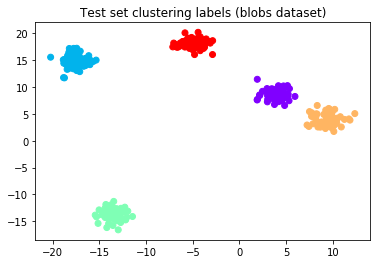

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from reval.best_nclust_cv import FindBestClustCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import zero_one_loss, adjusted_mutual_info_score
from reval.visualization import plot_metrics
import matplotlib.pyplot as plt
from reval.utils import kuhn_munkres_algorithm
from umap import UMAP
import numpy as np
import logging

logging.basicConfig(filename='manuscript_examples.log',
                    filemode='a',
                    format='%(asctime)s, %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.INFO)

"""
Three example functions that can be run from shell (change main at the bottom). 

Example 1: blobs dataset;
Example 2: real-world dataset (handwritten digits)
Example 3: ensamble learning with 18 datasets from UCI Machine Learning Repository.
           Algorithm performances are saved to manuscript_example.log file.
"""


# EXAMPLE 1: Isotropic Gaussian blobs
data = make_blobs(1000, 2, 5, center_box=(-20, 20),
                  random_state=42)
plt.figure(figsize=(6, 4))
plt.scatter(data[0][:, 0],
            data[0][:, 1],
            c=data[1], cmap='rainbow_r')
plt.title("Blobs dataset (N=1000)")
plt.show()

X_tr, X_ts, y_tr, y_ts = train_test_split(data[0],
                                          data[1],
                                          test_size=0.30,
                                          random_state=42,
                                          stratify=data[1])

classifier = KNeighborsClassifier(n_neighbors=5)
clustering = KMeans()

findbestclust = FindBestClustCV(nfold=10,
                                nclust_range=[2, 7],
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest, _ = findbestclust.best_nclust(X_tr, iter_cv=10, strat_vect=y_tr)
out = findbestclust.evaluate(X_tr, X_ts, nbest)

perm_lab = kuhn_munkres_algorithm(y_ts, out.test_cllab)

print(f"Best number of clusters: {nbest}")
print(f"Test set prediction ACC: "
      f"{1 - zero_one_loss(y_ts, perm_lab)}")
print(f'AMI (true labels vs predicted labels) = '
      f'{adjusted_mutual_info_score(y_ts, out.test_cllab)}')
print(f"Validation set normalized stability (misclassification):"
      f"{metrics['val'][nbest]}")
print(f'Test set ACC = {out.test_acc} '
      f'(true labels vs predicted labels)')

plt.figure(figsize=(6, 4))
plt.scatter(X_ts[:, 0], X_ts[:, 1],
            c=y_ts, cmap='rainbow_r')
plt.title("Test set true labels (blobs dataset)")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_ts[:, 0], X_ts[:, 1],
            c=perm_lab, cmap='rainbow_r')
plt.title("Test set clustering labels (blobs dataset)")
plt.show()

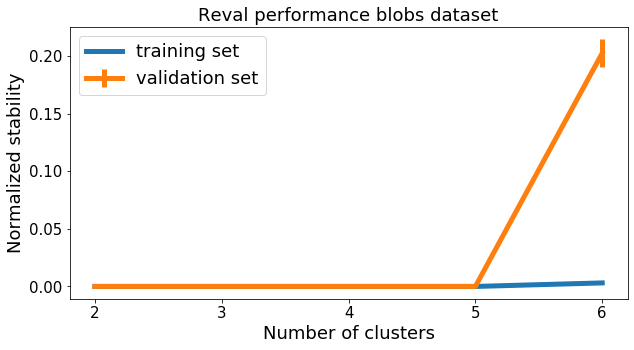

In [3]:
plot_metrics(metrics, title="Reval performance blobs dataset",
             legend_loc=2, figsize=(10, 5))

In [7]:
import time
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from reval.best_nclust_cv import FindBestClustCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import zero_one_loss, adjusted_mutual_info_score
from reval.visualization import plot_metrics
import matplotlib.pyplot as plt
from reval.utils import kuhn_munkres_algorithm
from umap import UMAP
import numpy as np
import logging

logging.basicConfig(filename='manuscript_examples.log',
                    filemode='a',
                    format='%(asctime)s, %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.INFO)

# feat = [10, 100, 500, 1000]
feat = [10]
# samples = [100, 500, 1000, 1500, 2000, 2500, 3000]
samples = [100, 500]

perftime = []
for s in samples:
    perf = []
    for f in feat:
        start = time.time()
        data = make_blobs(s, f, 5, center_box=(-20, 20),
                      random_state=42)

        X_tr, X_ts, y_tr, y_ts = train_test_split(data[0],
                                                  data[1],
                                                  test_size=0.30,
                                                  random_state=42,
                                                  stratify=data[1])

        classifier = KNeighborsClassifier(n_neighbors=5)
        clustering = KMeans()

        findbestclust = FindBestClustCV(nfold=10,
                                        nclust_range=[2, 7],
                                        s=classifier,
                                        c=clustering,
                                        nrand=100)
        metrics, nbest, _ = findbestclust.best_nclust(X_tr, iter_cv=10, strat_vect=y_tr)
        perf.append(time.time()-start)
    perftime.append(perf)

In [12]:
perftime = np.array([[1,2,3, 3],
                    [4,5,6, 3]])
samples = [100, 500]


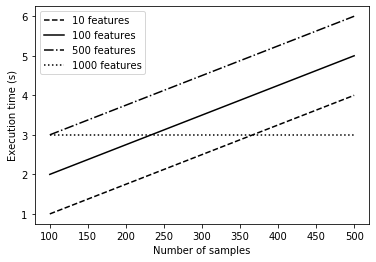

In [22]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(samples, perftime[:,0], label='10 features', linestyle='--', color='black')  # Plot some data on the axes.
ax.plot(samples, perftime[:,1], label='100 features', color='black')  # Plot more data on the axes...
ax.plot(samples, perftime[:,2], label='500 features', linestyle='-.', color='black')  # ... and some more.
ax.plot(samples, perftime[:,3], label='1000 features', linestyle=':', color='black')  # ... and some more.
ax.set_xlabel('Number of samples')  # Add an x-label to the axes.
ax.set_ylabel('Execution time (s)')  # Add a y-label to the axes.
ax.set_title("")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.savefig('/Users/ilandi/Desktop/performance_blobs.png', dpi=300)

In [52]:
from datasets import manuscript_builddatasets
from umap import UMAP
import matplotlib.pyplot as plt

In [53]:
data = manuscript_builddatasets.build_ucidatasets()

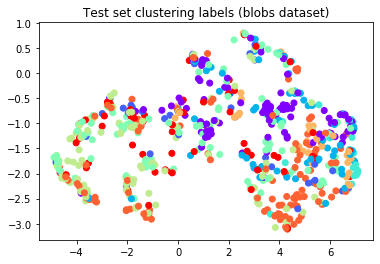

In [54]:
transform = UMAP(n_neighbors=30, min_dist=0.0, n_components=2)
X = transform.fit_transform(data.urban['data'])

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1],
            c=data.urban['target'], cmap='rainbow_r')
plt.title("Test set clustering labels (blobs dataset)")
plt.show()

In [55]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from reval.best_nclust_cv import FindBestClustCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import zero_one_loss, adjusted_mutual_info_score
from reval.visualization import plot_metrics
import matplotlib.pyplot as plt
from reval.utils import kuhn_munkres_algorithm
from umap import UMAP
import numpy as np
data = (X, data.urban['target'])
X_tr, X_ts, y_tr, y_ts = train_test_split(data[0],
                                          data[1],
                                          test_size=0.30,
                                          random_state=42)

classifier = KNeighborsClassifier(n_neighbors=5)
clustering = KMeans()

findbestclust = FindBestClustCV(nfold=5,
                                nclust_range=[2, 15],
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest, _ = findbestclust.best_nclust(X_tr, iter_cv=100, strat_vect=y_tr)

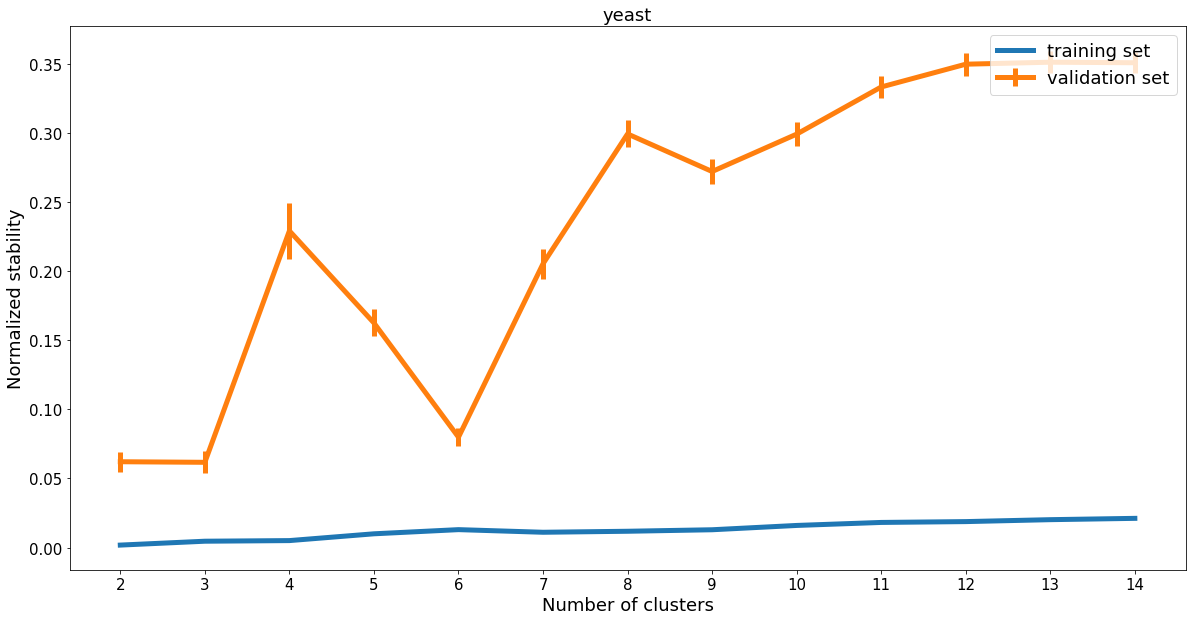

In [56]:
plot_metrics(metrics, title='yeast')

In [46]:
findbestclust.evaluate(X_tr, X_ts, nbest)

Eval(train_cllab=array([6, 5, 4, ..., 5, 0, 2], dtype=int32), train_acc=0.9884393063583815, test_cllab=array([5, 5, 2, 2, 6, 5, 4, 1, 2, 6, 6, 5, 5, 2, 0, 0, 3, 0, 6, 2, 0, 4,
       6, 4, 5, 2, 5, 0, 4, 6, 1, 1, 6, 0, 1, 2, 7, 4, 0, 5, 2, 6, 4, 1,
       4, 5, 0, 4, 2, 4, 4, 1, 6, 2, 6, 4, 4, 5, 4, 6, 0, 1, 2, 3, 0, 4,
       3, 4, 2, 4, 4, 2, 5, 4, 3, 2, 5, 5, 2, 5, 5, 2, 1, 5, 0, 5, 0, 1,
       3, 2, 6, 5, 5, 4, 6, 3, 4, 5, 6, 0, 1, 2, 6, 1, 6, 4, 5, 5, 4, 0,
       1, 0, 2, 4, 0, 4, 3, 0, 5, 4, 5, 2, 5, 6, 0, 5, 2, 4, 4, 5, 3, 1,
       6, 0, 6, 6, 3, 1, 0, 1, 2, 3, 2, 0, 0, 0, 0, 1, 4, 2, 6, 2, 0, 0,
       2, 6, 6, 0, 6, 4, 3, 0, 0, 1, 2, 0, 3, 5, 5, 4, 2, 4, 0, 0, 2, 2,
       2, 2, 6, 3, 1, 0, 3, 3, 0, 1, 3, 2, 2, 6, 2, 4, 2, 2, 0, 4, 6, 3,
       0, 4, 5, 1, 4, 2, 1, 5, 6, 3, 1, 4, 1, 4, 5, 2, 1, 0, 5, 2, 1, 5,
       6, 2, 4, 0, 7, 4, 5, 3, 1, 1, 5, 3, 0, 6, 0, 0, 5, 4, 0, 5, 0, 5,
       6, 1, 4, 4, 0, 0, 1, 0, 2, 4, 6, 2, 4, 4, 3, 2, 5, 2, 4, 6, 4, 2,
       6, 6, 2, 3, 4,

In [47]:
findbestclust.evaluate(X_tr, X_ts, 10)

Eval(train_cllab=array([6, 3, 1, ..., 3, 5, 7], dtype=int32), train_acc=0.9884393063583815, test_cllab=array([3, 3, 4, 4, 6, 3, 8, 2, 4, 6, 6, 3, 3, 4, 5, 5, 9, 5, 6, 7, 5, 1,
       6, 8, 3, 7, 3, 5, 8, 6, 2, 2, 6, 5, 2, 7, 0, 1, 5, 3, 4, 6, 1, 2,
       1, 3, 5, 1, 4, 1, 1, 2, 6, 4, 6, 1, 8, 3, 8, 6, 5, 2, 7, 9, 5, 8,
       9, 8, 4, 1, 8, 7, 3, 4, 9, 4, 3, 7, 4, 3, 3, 7, 2, 3, 5, 3, 5, 2,
       9, 7, 6, 3, 3, 1, 6, 9, 1, 3, 8, 1, 2, 4, 6, 2, 6, 1, 3, 3, 1, 5,
       2, 5, 4, 1, 5, 8, 9, 5, 3, 1, 3, 7, 3, 6, 5, 3, 4, 8, 8, 3, 9, 2,
       6, 1, 6, 6, 9, 2, 5, 2, 4, 9, 7, 5, 5, 5, 1, 2, 1, 4, 6, 7, 5, 5,
       4, 6, 8, 5, 6, 1, 9, 5, 5, 2, 4, 5, 9, 3, 3, 8, 7, 1, 5, 5, 4, 4,
       4, 7, 8, 9, 2, 5, 9, 9, 5, 2, 9, 7, 7, 8, 4, 8, 7, 4, 1, 8, 8, 9,
       5, 8, 3, 2, 1, 4, 2, 3, 6, 9, 2, 8, 2, 1, 3, 4, 2, 5, 3, 4, 2, 3,
       8, 7, 1, 5, 0, 8, 3, 9, 2, 2, 7, 9, 5, 6, 5, 5, 3, 8, 5, 3, 5, 3,
       6, 2, 8, 8, 5, 5, 2, 5, 4, 8, 6, 4, 1, 1, 9, 7, 3, 4, 1, 8, 8, 4,
       6, 8, 7, 9, 1,